### Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

### Load the Dataset

In [3]:

df=pd.read_csv('C:/50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
df.shape

(50, 5)

In [5]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

### Separate Features and Target

In [6]:
X = df.iloc[:, :-1].values  # all columns except last (Profit)
y = df.iloc[:, -1].values   # last column (Profit)

### Preview Features

In [7]:
 
print('\nFeature preview (first 5 rows):')
print(X[:5])


Feature preview (first 5 rows):
[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']]


### Handle Categorical Data (State Column)

In [8]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X_encoded = ct.fit_transform(X)
 

### Check Encoded Data

In [9]:
X = np.array(X_encoded)
print('\nAfter OneHotEncoding, feature shape:', X.shape)
print('\nFirst 5 rows after encoding:')
print(X[:5])
 


After OneHotEncoding, feature shape: (50, 6)

First 5 rows after encoding:
[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]]


### Train–Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
 
print('Training samples:', X_train.shape[0])
print('Test samples:', X_test.shape[0])

Training samples: 40
Test samples: 10


### Build and Train Multiple Linear Regression Model

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
 # Model Parameters
print('Intercept:', regressor.intercept_)
print('Number of coefficients:', len(regressor.coef_))

Intercept: 42467.5292485298
Number of coefficients: 6


### Predict Test Set Results

In [12]:
y_pred = regressor.predict(X_test)
y_pred
 

array([103015.20159796, 132582.27760815, 132447.73845174,  71976.09851258,
       178537.48221056, 116161.24230167,  67851.69209676,  98791.73374687,
       113969.43533014, 167921.06569551])

### Compare Actual vs Predicted Profit

In [13]:
comparison = pd.DataFrame({
    'Actual Profit': y_test,
    'Predicted Profit': np.round(y_pred,2)
})
display(comparison.reset_index(drop=True))
 

,Actual Profit,Predicted Profit
0,103282.38,103015.20
1,144259.40,132582.28
2,146121.95,132447.74
3,77798.83,71976.10
4,191050.39,178537.48
5,105008.31,116161.24
6,81229.06,67851.69
7,97483.56,98791.73
8,110352.25,113969.44
9,166187.94,167921.07


### Visualization: Actual vs Predicted

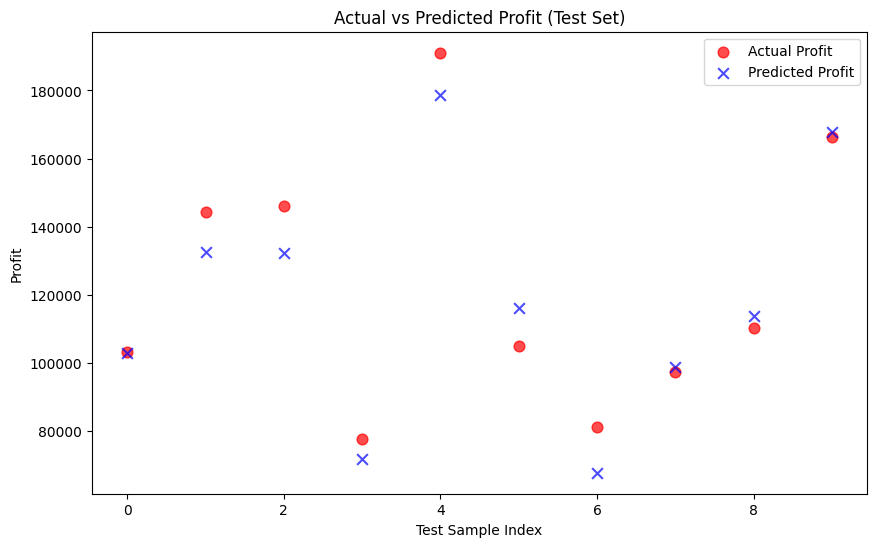

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual Profit', alpha=0.7, s=60)
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted Profit', alpha=0.7, marker='x', s=60)
plt.title('Actual vs Predicted Profit (Test Set)')
plt.xlabel('Test Sample Index')
plt.ylabel('Profit')
plt.legend()
plt.show()

 
 

### Residual Analysis

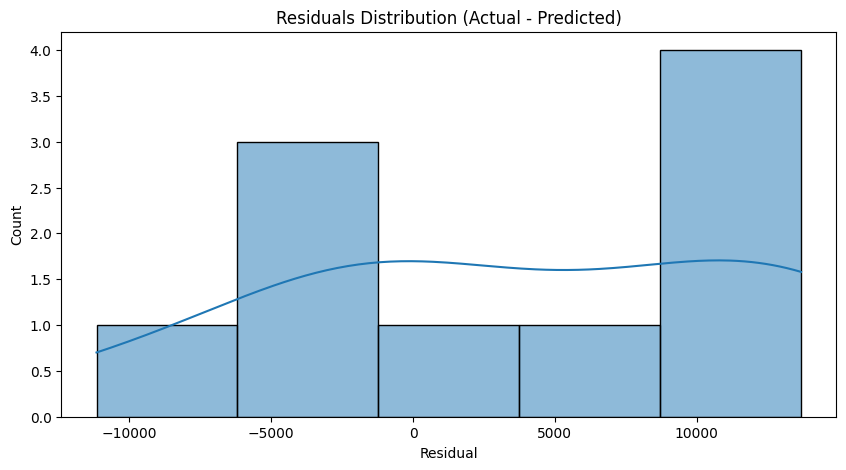

In [15]:
# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10,5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution (Actual - Predicted)')
plt.xlabel('Residual')
plt.show()
 

### Residuals vs Predicted

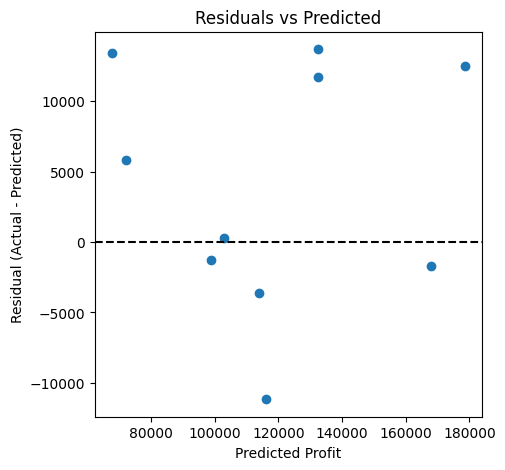

In [16]:

# Residuals vs Predicted (to check heteroscedasticity)
plt.figure(figsize=(5,5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Profit')
plt.ylabel('Residual (Actual - Predicted)')
plt.show()

### Model Evaluation Metrics

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 
mse = mean_squared_error(y_test, y_pred)
 
r2 = r2_score(y_test, y_pred)
 
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R^2 Score: {r2:.4f}')
 
# Sample prediction: build raw sample and encode using ct (same transformer used earlier)
raw_sample = np.array([[160000, 130000, 300000, 'California']])
encoded_sample = ct.transform(raw_sample)
encoded_sample = np.array(encoded_sample, dtype=float)
pred_sample = regressor.predict(encoded_sample)
print('\nSample startup predicted profit:', float(pred_sample[0]))
 

Mean Squared Error (MSE): 83502864.03
R^2 Score: 0.9347

Sample startup predicted profit: 181566.92389383633


### Business Scenario
A consumer goods company promotes its product using multiple advertising channels:

Television (TV)

Radio

Newspaper

The company wants to understand:

“How do different advertising channels together influence product sales?”

They also want to predict future sales based on planned advertising budgets.

You are appointed as a Data Analyst to analyze the data and build a predictive model.

Tasks

Load the dataset and examine the available columns.

Use TV, Radio, and Newspaper advertising spends as input features.

Use Sales as the target variable.

Build a model that learns the relationship between advertising spends and sales.

Train the model using historical data.

Predict sales for unseen data points.

Predict sales when the advertising budget is:

TV = 150

Radio = 20

Newspaper = 30

Evaluate the model’s prediction error.

Interpret the coefficients of the model:

Which advertising medium has the strongest impact on sales?

Which medium has the least impact?

Visualize:

Actual sales vs predicted sales

Based on your analysis, suggest:

One business recommendation to improve sales

One technical improvement to improve prediction accuracy


In [18]:
df=pd.read_csv('C:/advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [19]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [22]:
coefficients = pd.DataFrame({
    "Advertising Channel": X.columns,
    "Coefficient": model.coef_
})

print("Intercept:", model.intercept_)
coefficients


Intercept: 4.714126402214127


,Advertising Channel,Coefficient
0,TV,0.054509
1,Radio,0.100945
2,Newspaper,0.004337


In [23]:
y_pred = model.predict(X_test)


In [24]:
import pandas as pd

new_budget = pd.DataFrame({
    "TV": [150],
    "Radio": [20],
    "Newspaper": [30]
})

predicted_sales = model.predict(new_budget)
print("Predicted Sales:", predicted_sales[0])


Predicted Sales: 15.039523680317231


In [25]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 2.9077569102710896
R² Score: 0.9059011844150826


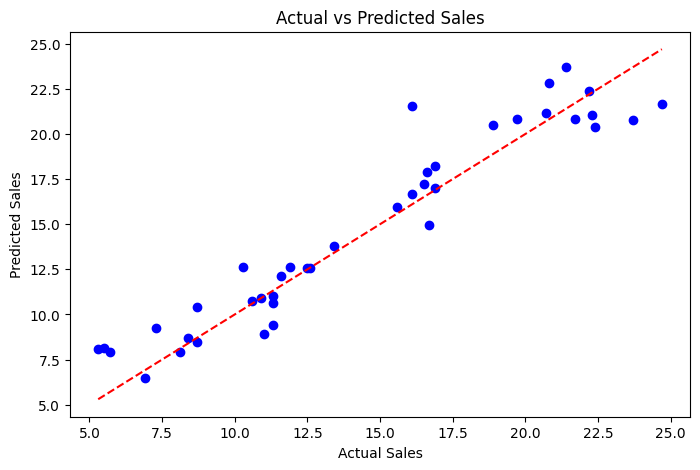

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color="blue")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--")

plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


Dataset: Medical Insurance Cost Dataset (Kaggle)

🔗 https://www.kaggle.com/datasets/mirichoi0218/insurance

Business Scenario

You are working as a Data Analyst for a health insurance company.

The company provides insurance policies to thousands of customers every year. Recently, management 
observed that insurance claim costs are increasing, but they are not sure which customer factors are 
driving the cost the most.

Business Goal

The company wants to:

Identify the key factors that increase medical insurance charges

so they can:

Design risk-based premium plans

Reduce losses caused by high-risk customers

Create fair pricing strategies for customers

Your task is to use Multiple Linear Regression to support this decision.

Dataset Reality (Messy Data)

The dataset contains real-world problems:

Some important columns are categorical (not numeric)

Certain customer attributes are text-based

One column represents geographical regions

Numerical features have very different value ranges

Some variables may be strongly related to each other

The data cannot be used directly for regression.

 Medical Cost Personal Datasets | Kaggle

Insurance Forecast by using Linear Regression
 

### Task 1 — Business Understanding

Business Scenario:
The insurance company wants to understand why insurance charges are rising and design risk-based premiums.

1.1 Target Variable

charges → the insurance cost for each customer

This is the financial concern for the company.

### Task 2 — Data Inspection

In [27]:
df=pd.read_csv('C:/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [28]:
df.shape

(1338, 7)

In [29]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [30]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Task 3 — Data Cleaning & Encoding

In [45]:
X = df.drop("charges", axis=1)  # Features
y = df["charges"]               # Target

categorical_features = ["sex", "smoker", "region"]

ct = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(drop="first"), categorical_features)],
    remainder="passthrough"
)

X_encoded = ct.fit_transform(X)
X_encoded

array([[ 0.  ,  1.  ,  0.  , ..., 19.  , 27.9 ,  0.  ],
       [ 1.  ,  0.  ,  0.  , ..., 18.  , 33.77,  1.  ],
       [ 1.  ,  0.  ,  0.  , ..., 28.  , 33.  ,  3.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ..., 18.  , 36.85,  0.  ],
       [ 0.  ,  0.  ,  0.  , ..., 21.  , 25.8 ,  0.  ],
       [ 0.  ,  1.  ,  1.  , ..., 61.  , 29.07,  0.  ]], shape=(1338, 8))

In [46]:
X = np.array(X_encoded)
y = np.array(y)

print("Shape of features:", X.shape)

Shape of features: (1338, 8)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [48]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [49]:
print("Intercept:", model.intercept_)
print("Number of coefficients:", len(model.coef_))


Intercept: -11931.219050326714
Number of coefficients: 8


In [50]:
y_pred = model.predict(X_test)

In [51]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 33596915.85136149
R² Score: 0.7835929767120722


In [52]:
coefficients = pd.DataFrame({
    "Feature": ct.get_feature_names_out(),
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

coefficients

,Feature,Coefficient
1,encoder__smoker_yes,23651.128856
7,remainder__children,425.278784
6,remainder__bmi,337.092552
5,remainder__age,256.975706
0,encoder__sex_male,-18.591692
2,encoder__region_northwest,-370.677326
3,encoder__region_southeast,-657.864297
4,encoder__region_southwest,-809.799354


In [53]:
sample = pd.DataFrame({
    "age": [40],
    "sex": ["female"],
    "bmi": [28.5],
    "children": [2],
    "smoker": ["yes"],
    "region": ["southeast"]
})

sample_encoded = ct.transform(sample)
predicted_charge = model.predict(sample_encoded)
print("Predicted insurance charge:", float(predicted_charge[0]))


Predicted insurance charge: 31798.76903970651


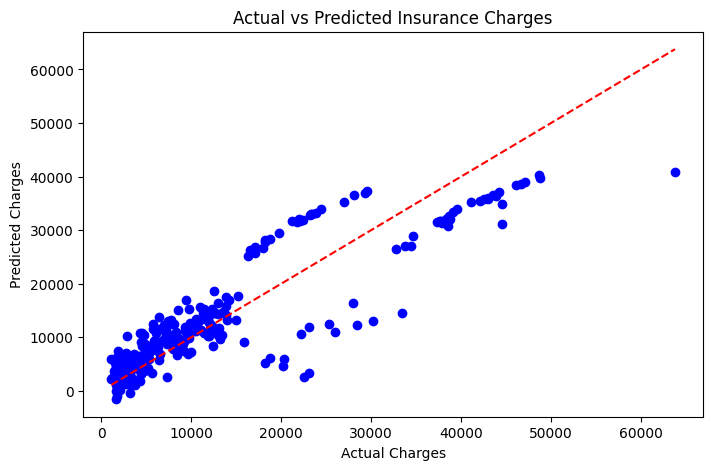

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color="blue")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.show()


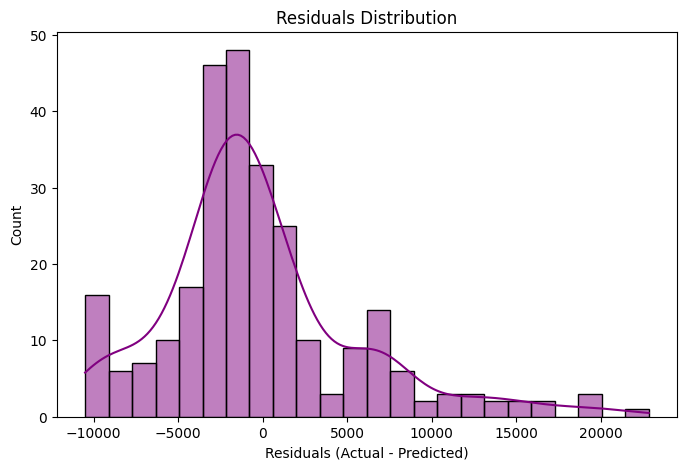

In [55]:
residuals = y_test - y_pred

# Residual Distribution
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, color="purple")
plt.xlabel("Residuals (Actual - Predicted)")
plt.title("Residuals Distribution")
plt.show()


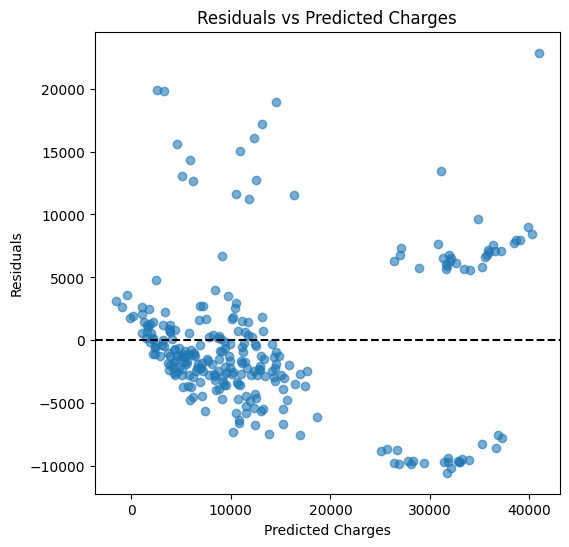

In [44]:

# Residuals vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Charges")
plt.show()

### Task 4 — Feature Scaling & Comparability

In [57]:
numeric_cols = ["age", "bmi", "children"]
print(df[numeric_cols].describe())


               age          bmi     children
count  1338.000000  1338.000000  1338.000000
mean     39.207025    30.663397     1.094918
std      14.049960     6.098187     1.205493
min      18.000000    15.960000     0.000000
25%      27.000000    26.296250     0.000000
50%      39.000000    30.400000     1.000000
75%      51.000000    34.693750     2.000000
max      64.000000    53.130000     5.000000


### Task 5 — The Hidden Trap (Multicollinearity)

In [56]:
import numpy as np

numeric_df = df[["age", "bmi", "children"]]
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


               age       bmi  children
age       1.000000  0.109272  0.042469
bmi       0.109272  1.000000  0.012759
children  0.042469  0.012759  1.000000
